# Project 2 - Ames Housing Project

## Problem Statement

Use the well known Ames housing data to create a regression model that predicts the price of houses in Ames, IA. 

## Executive Summary

For this project, we are analysing Ames housing data using regression model to predict the price of a house. The following data science process was carried out:
- Define problem statement
- Gather data
- Explore data
- Clean and preprocess data
- Create model
- Evaluate model
- Answer problem

## Data Dictionary
### A copy of the dictionary can be found here : 
https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data

### Definition of the new column added:

|Feature|Type|Description|
|---|---|---|
|total_score|int|total quality score of the house

Formulae for total_score:  ('Overall Qual' * 'Exter Qual' * 'Kitchen Qual' * 'Bsmt Qual')

### Import Libraries

In [303]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Data Import

In [304]:
#settings to see all columns / rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [305]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [306]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [307]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [308]:
train.shape

(2051, 81)

In [309]:
test.shape

(879, 80)

In [310]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [311]:
test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


### Create column list for continuous and categorical variables

In [312]:
# according to documentation provided, MS Subclass is nominal and not numeric feature.
# we shall change its datatype to object
train['MS SubClass'] = train['MS SubClass'].astype(object)

In [313]:
# All continuous variables
numeric_cols = [col for col in train.columns if train[col].dtype != "object"]
print('Numerical variables : {}'.format(len(numeric_cols)))
print(numeric_cols)
print('---------------------\n')

# All categorical variables (both ordinal and nominal)
object_cols = [col for col in train.columns if train[col].dtype == "object"]

# All ordinal variables
ordinal_cols = ['Exter Qual','Exter Cond','Heating QC','Bsmt Qual','Bsmt Cond','Kitchen Qual','Garage Qual',
                'Garage Cond','BsmtFin Type 1','BsmtFin Type 2','Garage Finish','Paved Drive','Central Air',
                'Bsmt Exposure','Lot Shape','Electrical','Functional','Land Slope','Utilities','Overall Qual', 
                'Overall Cond']
print('Ordinal variables : {}'.format(len(ordinal_cols)))
print(ordinal_cols)
print('---------------------\n')

# All nominal variables (object_cols - ordinal_cols)
nominal_cols = list(set(object_cols) - set(ordinal_cols))
#nominal_cols.append('SalePrice')
print('Nominal variables : {}'.format(len(nominal_cols)))
print(nominal_cols)

Numerical variables : 38
['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
---------------------

Ordinal variables : 21
['Exter Qual', 'Exter Cond', 'Heating QC', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Garage Qual', 'Garage Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Finish', 'Paved Drive', 'Central Air', 'Bsmt Exposure', 'Lot Shape', 'Electrical', 'Functional', 'Land Slope', 'Utilities', 'Overall Qual', 'Overall Cond']
---------------------

Nominal variables : 24
['Ext

## Data Cleaning
### Check datatypes/Null Values

In [314]:
# Check column data types
train.dtypes

Id                   int64
PID                  int64
MS SubClass         object
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [315]:
# Create a function to check for nulls
def check_null(df):
    #input : dataframe
    #output : dataframe containing 2 columns on missing data (total count, percent)
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total']>0]

In [316]:
check_null(train)

,Total,Percent
Pool QC,2042,0.995612
Misc Feature,1986,0.968308
Alley,1911,0.931741
Fence,1651,0.804973
Fireplace Qu,1000,0.487567
Lot Frontage,330,0.160897
Garage Finish,114,0.055583
Garage Cond,114,0.055583
Garage Qual,114,0.055583
Garage Yr Blt,114,0.055583


### Impute Null Values

#### clean data are stored in train_clean, test_clean

In [317]:
#make a copy of the dataframe before we start changing the data
train_clean = train.copy()
test_clean = test.copy()

In [318]:
#Columns with large no. of missing values: Pool QC, Misc Feature, Alley, Fence, Fireplace Qu
#These are data missing at random for houses without these facilities.
#Let's filled them with NA
na_list = ['Pool QC', 'Misc Feature', 'Alley', 'Fence','Fireplace Qu']
train_clean[na_list] = train_clean[na_list].fillna('NA')
test_clean[na_list] = test_clean[na_list].fillna('NA')

In [319]:
#column: Lot Frontage       missing count: 330, fill with 0
train_clean['Lot Frontage'] = train_clean['Lot Frontage'].fillna(0)
test_clean['Lot Frontage'] = test_clean['Lot Frontage'].fillna(0)

In [320]:
#column: Garage Yr Blt      missing count: 114, fill with 0 
#These are data missing at random for houses without garage
#Let's filled them with 0
train_clean['Garage Yr Blt'] = train_clean['Garage Yr Blt'].fillna(0)
test_clean['Garage Yr Blt'] = test_clean['Garage Yr Blt'].fillna(0)

In [321]:
#fill the following columns with 'NA'
#These are data missing at random for houses without garage/basement
na_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond','Bsmt Qual',
           'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
for c in na_cols:
    train_clean[c] = train_clean[c].fillna('NA')
    test_clean[c] = test_clean[c].fillna('NA')

In [322]:
#Mas Vnr Type      missing count: 22,  fill with 'None'
#These are data missing at random for houses without mas vnr
train_clean['Mas Vnr Type'] = train_clean['Mas Vnr Type'].fillna('None')
test_clean['Mas Vnr Type'] = test_clean['Mas Vnr Type'].fillna('None')

#Mas Vnr Area      22
train_clean['Mas Vnr Area'] = train_clean['Mas Vnr Area'].fillna(0)
test_clean['Mas Vnr Area'] = test_clean['Mas Vnr Area'].fillna(0)

In [323]:
#fill the following columns with 0
#These are data missing at random for houses without basement
cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Bsmt Full Bath','Bsmt Half Bath']
for c in cols:
    train_clean[c] = train_clean[c].fillna(0)
    test_clean[c] = test_clean[c].fillna(0)

In [324]:
#fill 'Total Bsmt SF' with the sum of SF, SF1, SF2
#these missing data can be calcuated from its base columns
train_clean['Total Bsmt SF'] = train_clean['Total Bsmt SF'].fillna(train_clean['Bsmt Unf SF']+train_clean['BsmtFin SF 1']+train_clean['BsmtFin SF 2'])
test_clean['Total Bsmt SF'] = test_clean['Total Bsmt SF'].fillna(test_clean['Bsmt Unf SF']+test_clean['BsmtFin SF 1']+test_clean['BsmtFin SF 2'])


In [325]:
# fill the following with mean()
# for test data, we are to imputed the missing values with train mean()
train_ga_mean = train['Garage Area'].mean()
train_gc_mean = train['Garage Cars'].mean()
train_clean[train_clean['Garage Area'].isnull()]
train_clean['Garage Area'] = train_clean['Garage Area'].fillna(train_ga_mean )
train_clean['Garage Cars'] = train_clean['Garage Cars'].fillna(train_gc_mean )

test_clean['Garage Area'] = test_clean['Garage Area'].fillna(train_ga_mean )
test_clean['Garage Cars'] = test_clean['Garage Cars'].fillna(train_gc_mean )

In [326]:
check_null(train_clean)

,Total,Percent


In [327]:
check_null(test_clean)

,Total,Percent
Electrical,1,0.001138


In [328]:
#test set has only missing value in 'Electrical'
#this is data missing at random. lets fill it with 0
test_clean['Electrical'] = test_clean['Electrical'].fillna(0)

### Transform Categorical Variables(ordinal) to Numerical Values
#### Based on the data dictionary, the following categorical variables are actually ordinal variables. Let's map them to their respective numerical values as show in data dictionary.

> <font size = 3 color = "crimson"> The documentation indicates that MS Subclass is of type nominal even though the values are numerical. Do process this feature by performing one-hot encoding. </font>

In [329]:
#function to convert ordinal columns to numeric value via mapping dict
def map_ordinal_col(df, col, mapdict):
    #input: dataframe, column, mapping dictionary
    df[col] = df[col].map(mapdict)

In [330]:
#converting ordinal columns to numeric value
mapdict = {'Ex': 5,'Gd': 4,'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
cols = ['Exter Qual','Exter Cond','Heating QC','Bsmt Qual','Bsmt Cond','Kitchen Qual','Garage Qual','Garage Cond']
for c in cols:
    map_ordinal_col(train_clean,c,mapdict)
    map_ordinal_col(test_clean,c,mapdict)
    
mapdict = {'GLQ': 6,'ALQ': 5,'BLQ': 4, 'Rec': 3 ,'LwQ': 2, 'Unf': 1 ,'NA':0 }
cols = ['BsmtFin Type 1','BsmtFin Type 2']
for c in cols:
    map_ordinal_col(train_clean,c,mapdict)
    map_ordinal_col(test_clean,c,mapdict)

map_ordinal_col(train_clean, 'Garage Finish', {'Fin': 3,'RFn': 2, 'Unf': 1, 'NA':0})
map_ordinal_col(train_clean,'Paved Drive',{'Y':2, 'N':1, 'P':0 })
map_ordinal_col(train_clean,'Central Air',{'Y':1, 'N':0 })
map_ordinal_col(train_clean,'Bsmt Exposure',{'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0 }) 
map_ordinal_col(train_clean,'Lot Shape',{'Reg':3,'IR1':2,'IR2':1,'IR3':0})
map_ordinal_col(train_clean,'Electrical', {'SBrkr':4, 'FuseA':3,'FuseF':2, 'FuseP':1, 'Mix':0})
map_ordinal_col(train_clean,'Functional', {'Typ':7, 'Min2':6, 'Min1':5 , 'Mod':4 ,'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0 })
map_ordinal_col(train_clean,'Land Slope', {'Gtl':2, 'Mod':1, 'Sev':0})
map_ordinal_col(train_clean,'Utilities', {'AllPub':3, 'NoSewr':2, 'NoSeWa':1,'ELO':0})

#test data
map_ordinal_col(test_clean, 'Garage Finish', {'Fin': 3,'RFn': 2, 'Unf': 1, 'NA':0})
map_ordinal_col(test_clean,'Paved Drive',{'Y':2, 'N':1, 'P':0 })
map_ordinal_col(test_clean,'Central Air',{'Y':1, 'N':0 })
map_ordinal_col(test_clean,'Bsmt Exposure',{'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0 }) 
map_ordinal_col(test_clean,'Lot Shape',{'Reg':3,'IR1':2,'IR2':1,'IR3':0})
map_ordinal_col(test_clean,'Electrical', {'SBrkr':4, 'FuseA':3,'FuseF':2, 'FuseP':1, 'Mix':0, 0:0})
map_ordinal_col(test_clean,'Functional', {'Typ':7, 'Min2':6, 'Min1':5 , 'Mod':4 ,'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0 })
map_ordinal_col(test_clean,'Land Slope', {'Gtl':2, 'Mod':1, 'Sev':0})
map_ordinal_col(test_clean,'Utilities', {'AllPub':3, 'NoSewr':2, 'NoSeWa':1,'ELO':0})


In [331]:
train_clean[ordinal_cols].head()

,Exter Qual,Exter Cond,Heating QC,Bsmt Qual,Bsmt Cond,Kitchen Qual,Garage Qual,Garage Cond,BsmtFin Type 1,BsmtFin Type 2,Garage Finish,Paved Drive,Central Air,Bsmt Exposure,Lot Shape,Electrical,Functional,Land Slope,Utilities,Overall Qual,Overall Cond
0,4,3,5,3,3,4,3,3,6,1,2,2,1,1,2,4,7,2,3,6,8
1,4,3,5,4,3,4,3,3,6,1,2,2,1,1,2,4,7,2,3,7,5
2,3,4,3,3,3,4,3,3,6,1,1,2,1,1,3,4,7,2,3,5,7
3,3,3,4,4,3,3,3,3,1,1,3,2,1,1,3,4,7,2,3,5,5
4,3,3,3,2,4,3,3,3,1,1,1,1,1,1,2,4,7,2,3,6,8


In [332]:
test_clean[ordinal_cols].head()

,Exter Qual,Exter Cond,Heating QC,Bsmt Qual,Bsmt Cond,Kitchen Qual,Garage Qual,Garage Cond,BsmtFin Type 1,BsmtFin Type 2,Garage Finish,Paved Drive,Central Air,Bsmt Exposure,Lot Shape,Electrical,Functional,Land Slope,Utilities,Overall Qual,Overall Cond
0,3,2,4,2,3,2,1,1,1,1,1,2,0,1,3,1,7,2,3,6,8
1,3,3,3,4,3,3,3,3,1,1,3,2,1,1,2,4,7,2,3,5,4
2,4,3,5,4,4,4,3,3,6,1,2,2,1,3,2,4,7,2,3,7,5
3,4,3,3,3,3,3,2,3,1,1,1,1,1,1,3,4,7,2,3,5,6
4,3,3,4,4,3,3,3,3,4,1,2,2,1,1,2,4,7,2,3,6,5


In [333]:
check_null(test_clean)

,Total,Percent


## Exploratory Data Analysis
### 1. Look at Continuous Variables' Correlations/Distributions

### Plot a Heatmap of the Correlation Matrix (All Continuous Variables)

In [334]:
def heatmap_plotter(corr, figsize=(16,10),annot=False):
    # Plot showing our linear forecast.
    fig = plt.figure(figsize=figsize)

    # Set up mask to be "True" in the upper triangle.
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corr, annot=annot,mask=mask)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

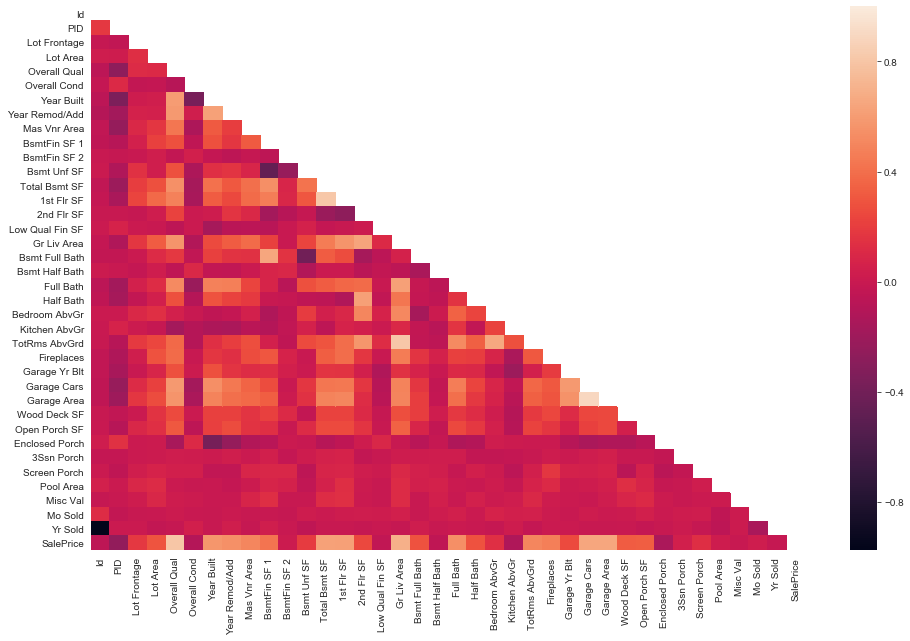

In [335]:
cor_num = train_clean[numeric_cols].corr()
heatmap_plotter(cor_num)

### Correlations of Top Continuous Variables 

In [336]:
#rank the variables and select those with high correlation (>0.5) with 'SalePrice'
corr_features = (cor_num[abs(cor_num['SalePrice']>0.5)])['SalePrice'].sort_values(ascending=False)
corr_features

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650246
Garage Cars       0.648197
Total Bsmt SF     0.629303
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
TotRms AbvGrd     0.504014
Mas Vnr Area      0.503579
Name: SalePrice, dtype: float64

### Plot a Heatmap of the Correlations of Top Continuous Variables

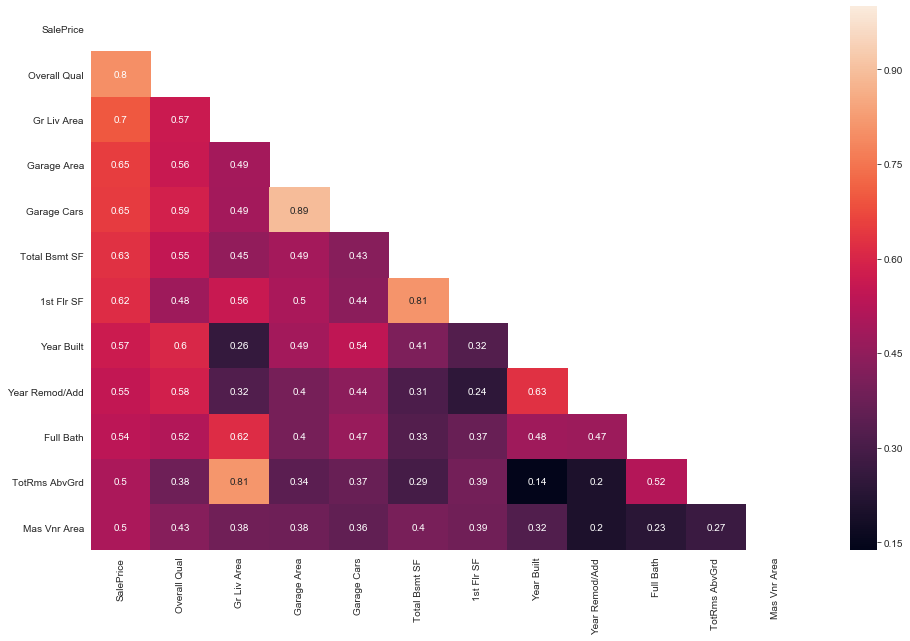

In [337]:
corr = train_clean[corr_features.index].corr()
heatmap_plotter(corr,annot=True)

Collinearity detected between 'Garage Cars' and 'Garage Area'. I will drop 'Garage Cars' since it has a lower correlation value. Similarly for 'Gr Liv Area' and 'TotRms AbvGrd', I will drop 'TotRms AbvGrd'. For '1st Flr SF' and 'Total Bsmt SF', I will drop '1st Flr SF'. These columns will be dropped in the pre-processing step.

In [338]:
cols_to_drop = ['Garage Cars','TotRms AbvGrd','1st Flr SF']

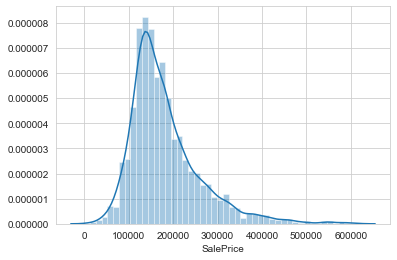

In [339]:
#check target variable : SalePrice
#plt.figure(figsize=(10,3))
sns.distplot(train['SalePrice'])

It was observed that our target variable 'SalePrice' is positively skewed.

### Scatter Plots of Top Continuous Variables

In [340]:
#sns.pairplot(train_clean[cor_features.index])

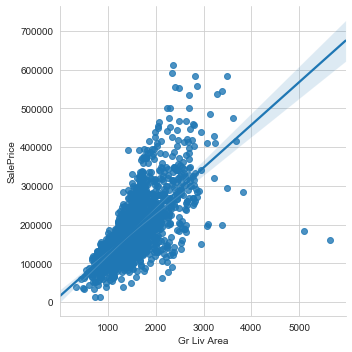

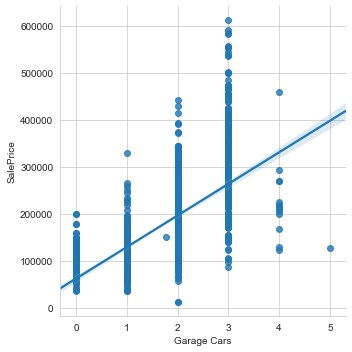

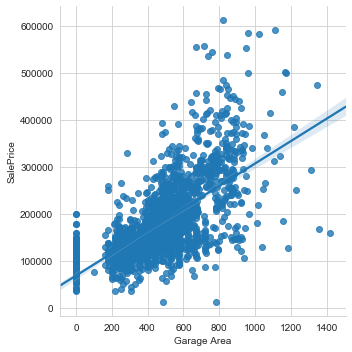

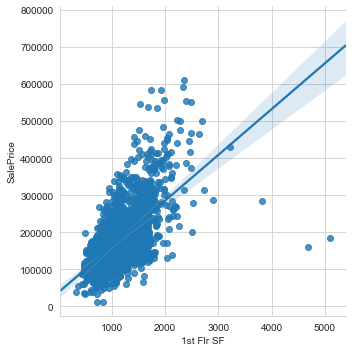

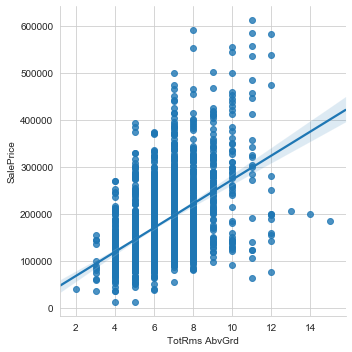

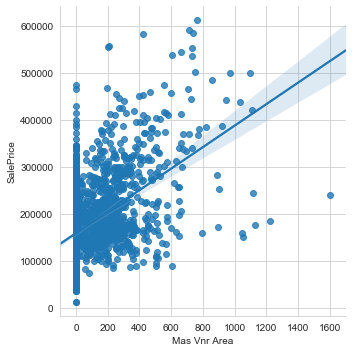

In [341]:
sns.lmplot(x='Gr Liv Area', y='SalePrice', data=train_clean)
sns.lmplot(x='Garage Cars', y='SalePrice', data=train_clean)
sns.lmplot(x='Garage Area', y='SalePrice', data=train_clean)
sns.lmplot(x='1st Flr SF', y='SalePrice', data=train_clean)
sns.lmplot(x='TotRms AbvGrd', y='SalePrice', data=train_clean)
sns.lmplot(x='Mas Vnr Area', y='SalePrice', data=train_clean)

Above scatter plots show that these continuous variabes are strongly correlated to our target
variable SalePrice. For 'Gr Liv Area' variable, 2 outlier were detected having value > 5000. We shall remove them in the pre-processing step.

### Create histograms of All Continuous Variables

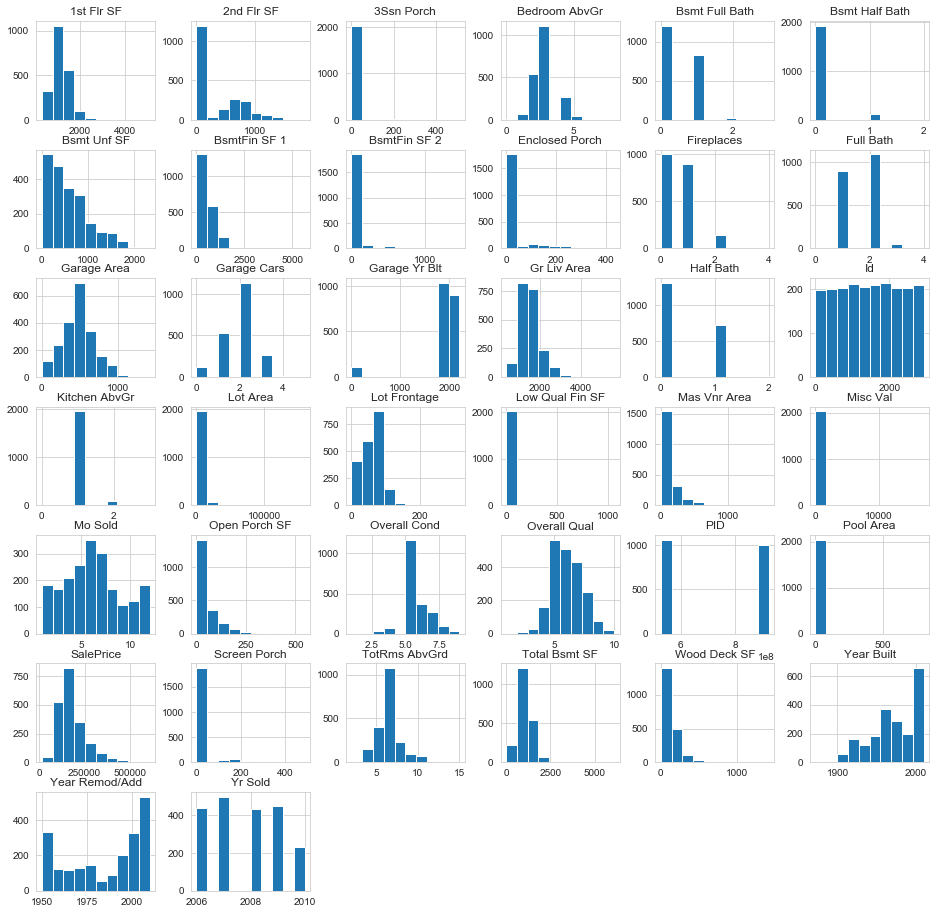

In [342]:
train_clean[numeric_cols].hist(figsize=(16,16));

The distribution of majority of the continuous variables are not normal.

### 2. Look at Categorical Variables (Ordinal) Correlations/Distributions
### Heatmap of the Correlation Matrix (All Categorical Variables (ordinal))

In [343]:
cols = ordinal_cols
cols.append('SalePrice')

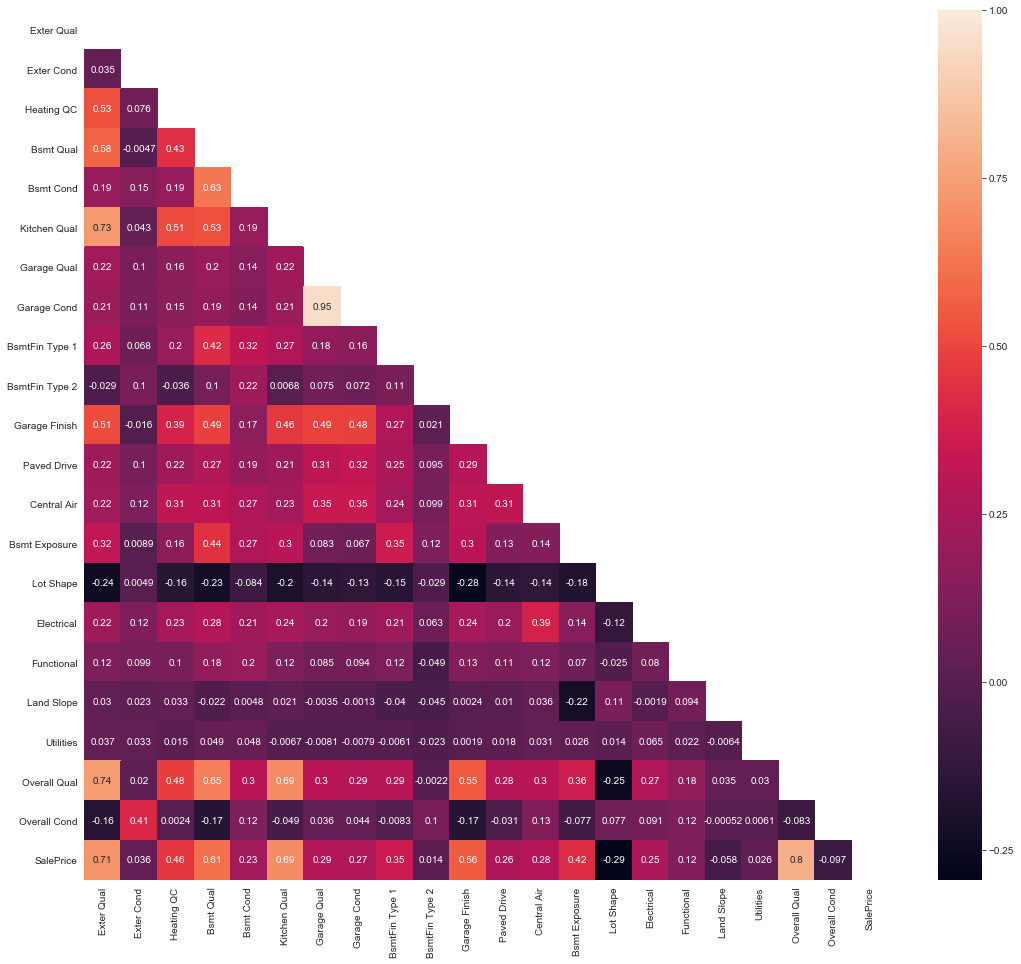

In [344]:
corr = train_clean[cols].corr()
heatmap_plotter(corr,figsize=(18,16),annot=True)

### Correlations of Top Categorical  Variables (Ordinal)

In [345]:
#rank the variables and select those with high correlation (>0.5) with 'SalePrice'
corr_features = (corr[abs(corr['SalePrice']>0.5)])['SalePrice'].sort_values(ascending=False)
corr_features

SalePrice        1.000000
Overall Qual     0.800207
Exter Qual       0.712146
Kitchen Qual     0.692336
Bsmt Qual        0.612188
Garage Finish    0.557839
Name: SalePrice, dtype: float64

### Heatmap of the Correlations of Top Categorical Variables (Ordinal)

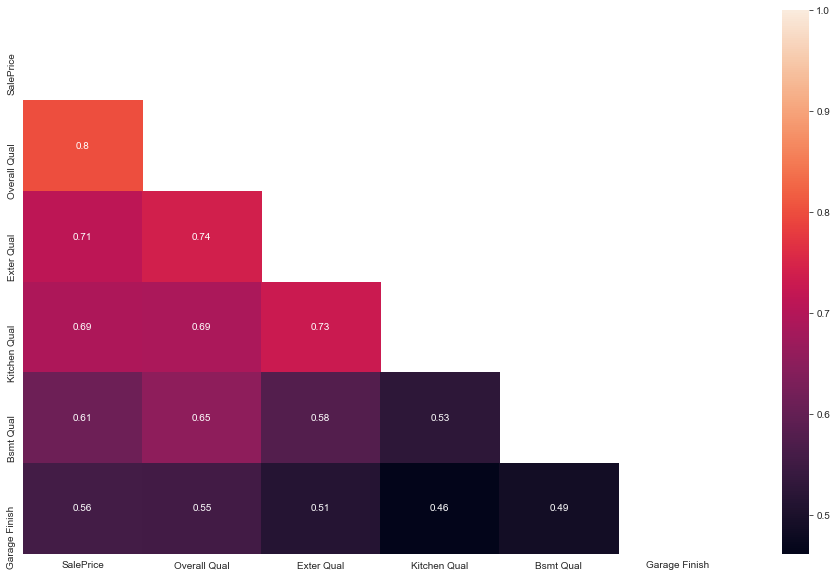

In [346]:
corr = train_clean[corr_features.index].corr()
heatmap_plotter(corr,annot=True)

We can see that OverallQual is the top most important feature for our target.

### Pair Plots of Top Categorical Variables(Ordinal)

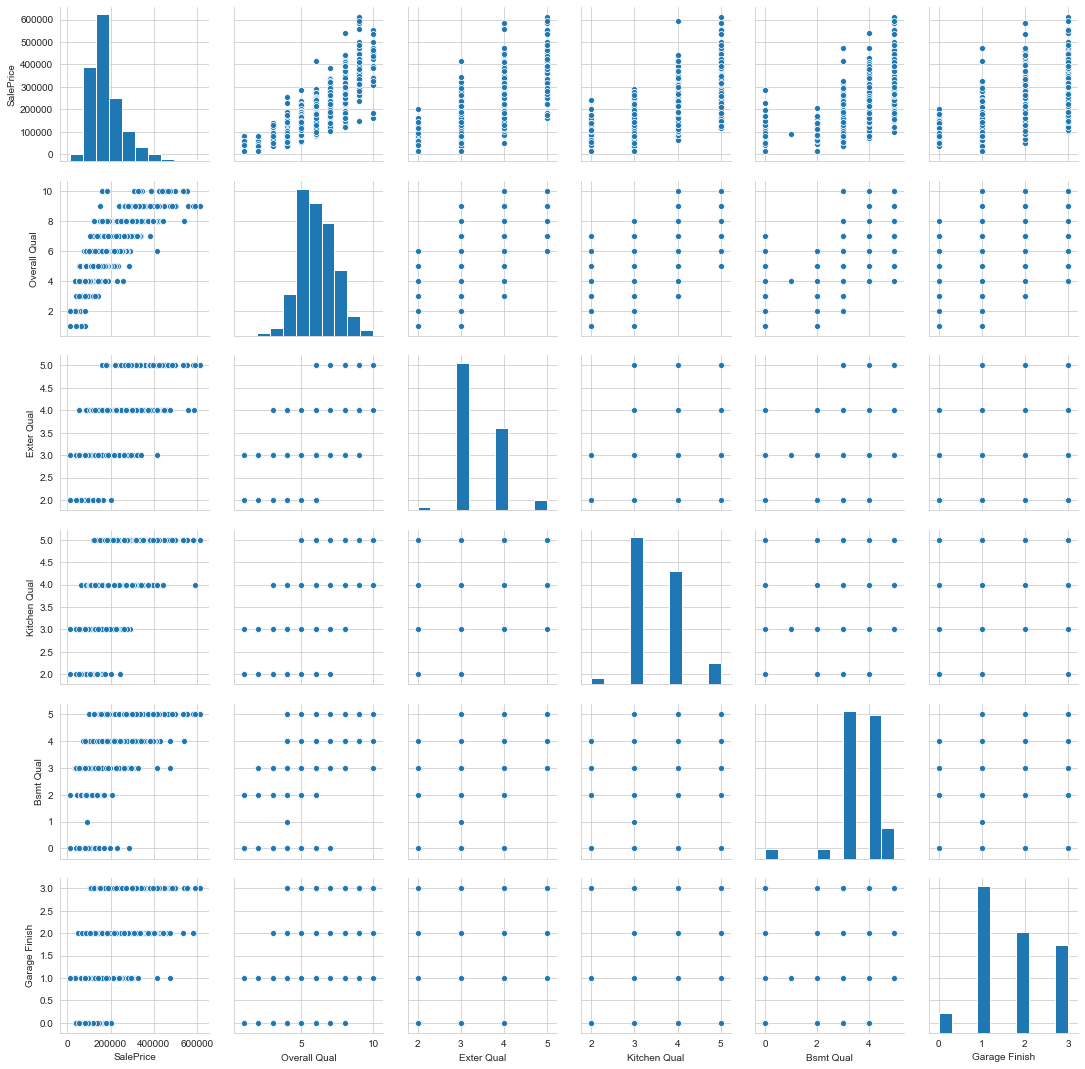

In [347]:
sns.pairplot(train_clean[corr_features.index])

### Boxplot : OverallQual with SalePrice

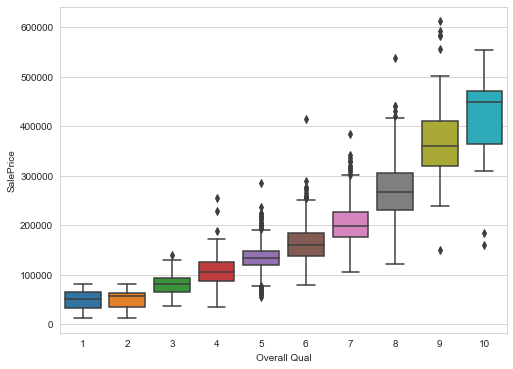

In [348]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Overall Qual',y='SalePrice',data=train)

This show a strong postive correlation. The higher the OverallQual score, which means the better the quality of the house,the higher the price. 

### Histograms of All Categorical Variables (Ordinal) 

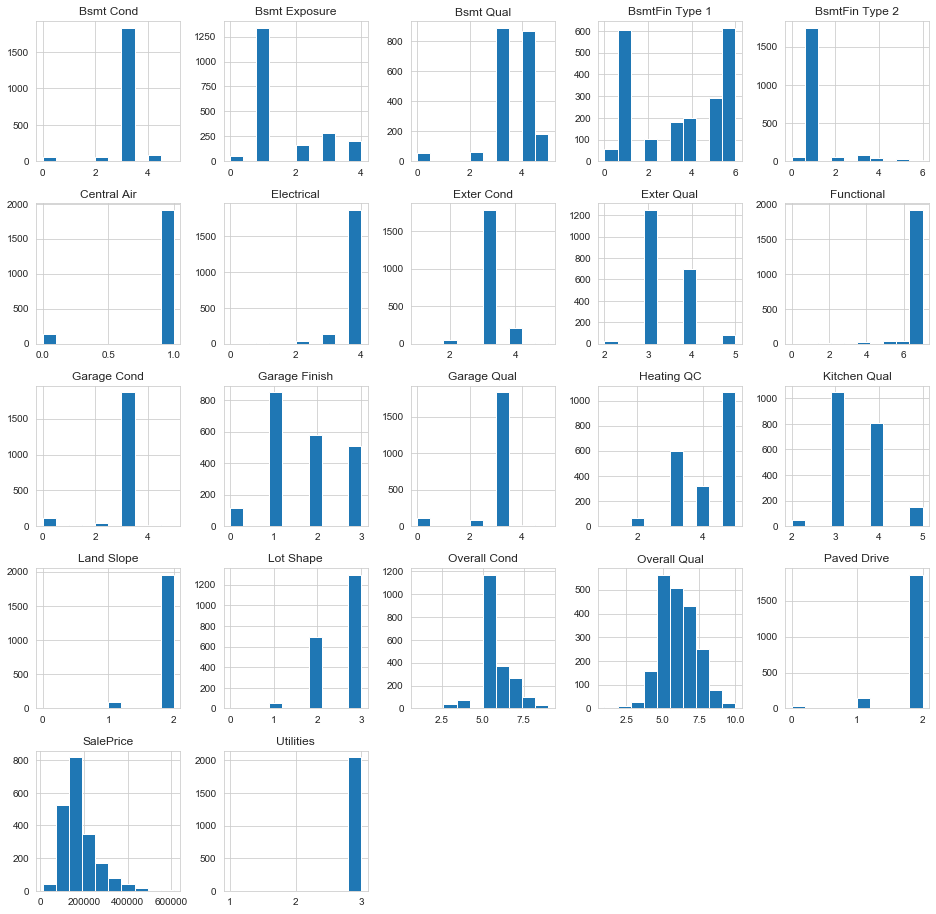

In [349]:
train_clean[ordinal_cols].hist(figsize=(16,16));

### 3. Look at Categorical Variables (Nominal) Correlations/Distributions

In [350]:
nominal_cols

['Exterior 1st',
 'Exterior 2nd',
 'Neighborhood',
 'Roof Matl',
 'Roof Style',
 'Garage Type',
 'MS SubClass',
 'Bldg Type',
 'Mas Vnr Type',
 'Fireplace Qu',
 'Condition 1',
 'Fence',
 'Street',
 'House Style',
 'Heating',
 'Misc Feature',
 'Condition 2',
 'Alley',
 'Foundation',
 'Lot Config',
 'MS Zoning',
 'Land Contour',
 'Sale Type',
 'Pool QC']

> <font size = 3 color = "crimson"> Any reason why you have chosen to plot Sale Price against GarageType and not the other categorical features. </font>

Text(0.5, 1.0, 'Distribution of GarageType')

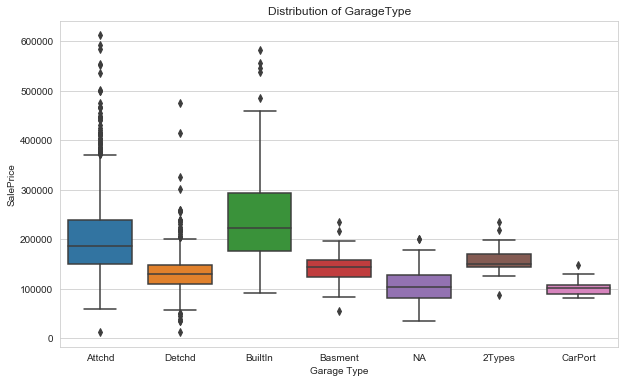

In [351]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Garage Type', y='SalePrice',data=train_clean)
plt.title('Distribution of GarageType')

This shows the different types of garage for the houses.

## Data Pre-Processing

#### Pre-processed data are stored in train_prep, test_prep

In [352]:
check_null(test_clean)

,Total,Percent


In [353]:
#make a copy of the clean dataframe before pre-processing steps.
train_prep = train_clean.copy()
test_prep = test_clean.copy()

In [354]:
check_null(test_prep)

,Total,Percent


### Remove Collinear Features
#### These features were identified to be collinear with each other during EDA so they will be dropped

In [355]:
cols_to_drop = ['Garage Cars','TotRms AbvGrd','1st Flr SF']

In [356]:
cols_to_drop.append('Bsmt Unf SF')
cols_to_drop.append('BsmtFin SF 1')
cols_to_drop.append('BsmtFin SF 2')
cols_to_drop.append('PID')
cols_to_drop.append('Id')

In [357]:
for c in cols_to_drop:
    train_prep.drop(c,axis=1,inplace=True)
    test_prep.drop(c,axis=1,inplace=True)

In [358]:
#train_prep.drop('Garage Cars', axis=1, inplace=True)
#train_prep.drop('TotRms AbvGrd',axis=1, inplace=True)
#test_prep.drop('Garage Cars', axis=1, inplace=True)
#test_prep.drop('TotRms AbvGrd',axis=1, inplace=True)

### Remove outliers
#### The 2 outliers in 'GrLivArea' identified during EDA will be removed.

In [359]:
#outliers with value > 5000, let's investigate
train_prep[train_prep['Gr Liv Area'] > 5000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,60,RL,313.0,63887,Pave,NA,0,Bnk,3,Corner,2,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,4,6,1,6110.0,GasA,5,1,4,950,0,5642,2.0,0.0,2,1,3,1,5,7,3,Gd,Attchd,2008.0,3,1418.0,3,3,2,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,160000
1885,20,RL,128.0,39290,Pave,NA,2,Bnk,3,Inside,2,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5,3,4,6,1,5095.0,GasA,5,1,4,0,0,5095,1.0,1.0,2,1,2,1,5,7,2,Gd,Attchd,2008.0,3,1154.0,3,3,2,546,484,0,0,0,0,NA,NA,Elev,17000,10,2007,New,183850


In [360]:
train_prep.drop(960,axis=0, inplace=True)
train_prep.drop(1885,axis=0, inplace=True)

In [361]:
#There are some outliers with SalePrice > 600000, let's investigate
train[train['SalePrice'] > 600000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1671,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,2364,0,0,2364,1.0,0.0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,611657


In [362]:
train_prep.drop(1671,axis=0, inplace=True)

###  One-Hot Encoding (Nominal Variables)

In [363]:
train_prep.shape,test_prep.shape

((2048, 73), (879, 72))

In [364]:
combined = train_prep.append(test_prep)
combined.shape

/Users/guathwalow/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(2927, 73)

In [365]:
#train_prep = pd.get_dummies(train_prep,drop_first=True)
combined = pd.get_dummies(combined,drop_first=True)
combined.shape

(2927, 221)

In [366]:
train_prep = combined.iloc[0:2048].copy()
test_prep = combined.iloc[2048:].copy()
train_prep.shape, test_prep.shape

((2048, 221), (879, 221))

##  Feature Selection (Filter Method-VarianceThreshold) - Round 0
Dummied features consists of only 1 and 0 and would reflect low correlation with target. Hence, we should handle categorical features separately. In this section, we will drop unimportant categorical features using Variance Threshold, a filter method from sklearn library. This method does not take the target into consideration.

In [367]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


In [368]:
data_x = train_prep.drop('SalePrice',axis=1)
reduce_x = variance_threshold_selector(data_x,0.3)
print(reduce_x.shape)
print(reduce_x[:5])

(2048, 38)
   2nd Flr SF  3Ssn Porch  Bedroom AbvGr  Bsmt Cond  Bsmt Exposure  Bsmt Qual  \
0         754           0              3          3              1          3   
1        1209           0              4          3              1          4   
2           0           0              3          3              1          3   
3         700           0              3          3              1          4   
4         614           0              3          4              1          2   

   BsmtFin Type 1  BsmtFin Type 2  Enclosed Porch  Exter Qual  Fireplaces  \
0               6               1               0           4           0   
1               6               1               0           4           1   
2               6               1               0           3           0   
3               1               1               0           3           0   
4               1               1               0           3           0   

   Full Bath  Functional  Garage Area  

In [369]:
X0 = reduce_x
y = train_prep['SalePrice']

In [370]:
X0.shape, y.shape

((2048, 38), (2048,))

Model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training R2 score:  0.8799882671033818
Testing R2 score:  0.8686951257349825
MSE score:  743095024.2441764
RMSE score:  27259.769335857858


*** model coefficients: ***
2nd Flr SF           497.702227
3Ssn Porch          -362.974502
Bedroom AbvGr      -4869.322023
Bsmt Cond          -6973.782395
Bsmt Exposure       4611.216470
Bsmt Qual           5520.183378
BsmtFin Type 1      3186.915223
BsmtFin Type 2      -417.522703
Enclosed Porch       324.575278
Exter Qual          6884.746954
Fireplaces          2934.148580
Full Bath          -3990.862662
Functional          4594.337087
Garage Area         8141.983808
Garage Cond         -949.199992
Garage Finish        837.482736
Garage Qual         2329.910231
Garage Yr Blt      -4659.150481
Gr Liv Area        29605.510771
Heating QC          1668.743196
Kitchen Qual        6265.145642
Lot Area            5682.164224
Lot Frontage        4059.226982
Lot Sh

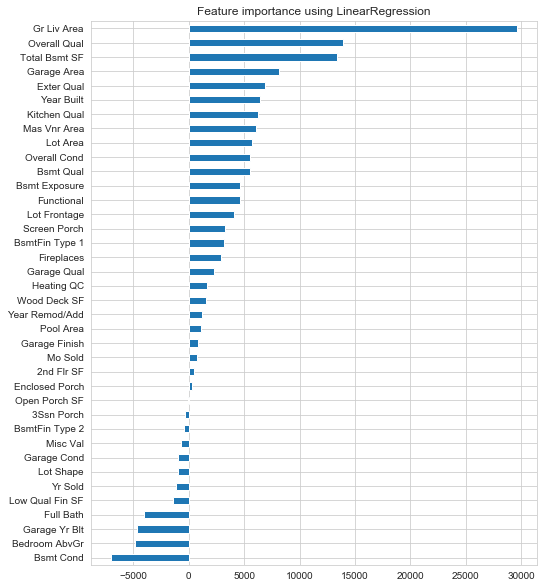

In [371]:
lr = LinearRegression()
coef = run_model(lr,X0,y, 'LinearRegression')

Text(0.5, 1.0, 'Feature importance using ')

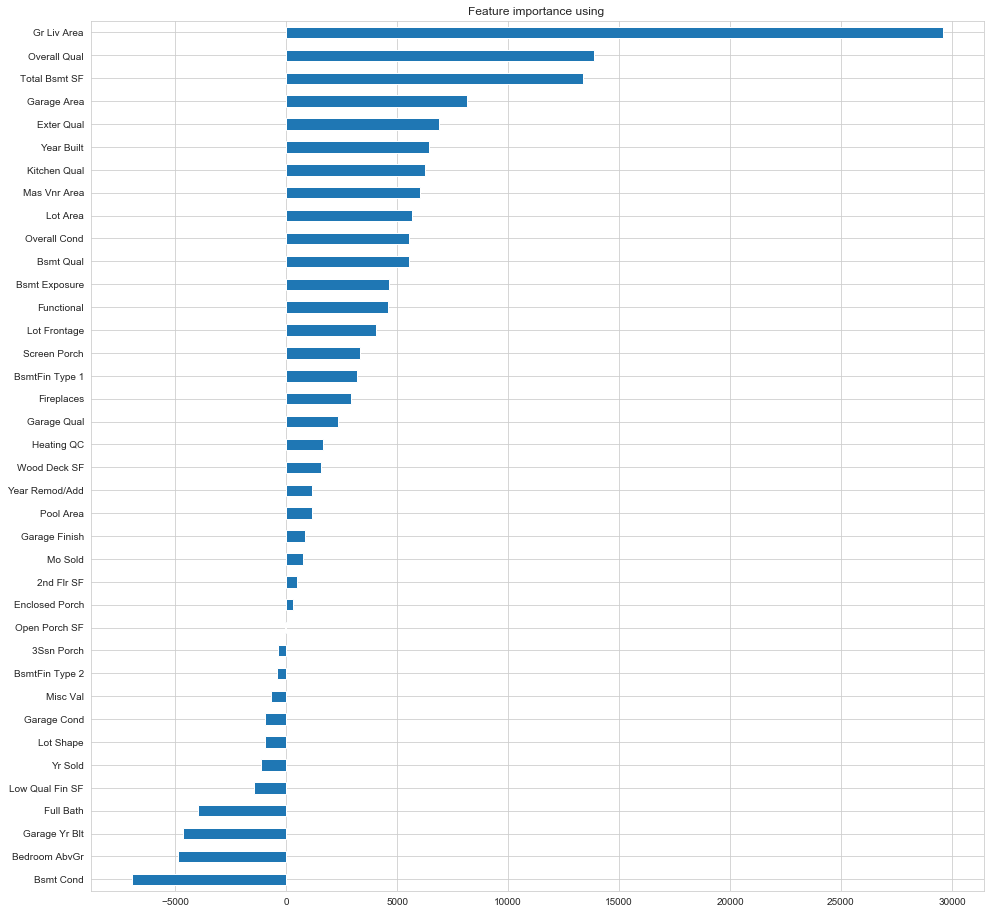

In [372]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (16.0, 16.0)
imp_coef.plot(kind = "barh")
plt.title('Feature importance using ')

In [373]:
coef.index

Index(['2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Cond',
       'Bsmt Exposure', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Enclosed Porch', 'Exter Qual', 'Fireplaces', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cond', 'Garage Finish', 'Garage Qual',
       'Garage Yr Blt', 'Gr Liv Area', 'Heating QC', 'Kitchen Qual',
       'Lot Area', 'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF',
       'Mas Vnr Area', 'Misc Val', 'Mo Sold', 'Open Porch SF', 'Overall Cond',
       'Overall Qual', 'Pool Area', 'Screen Porch', 'Total Bsmt SF',
       'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold'],
      dtype='object')

In [374]:
#save columns to feature_list
feature1_list = ['2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Cond',
       'Bsmt Exposure', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Enclosed Porch', 'Exter Qual', 'Fireplaces', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cond', 'Garage Finish', 'Garage Qual',
       'Garage Yr Blt', 'Gr Liv Area', 'Heating QC', 'Kitchen Qual',
       'Lot Area', 'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF',
       'Mas Vnr Area', 'Misc Val', 'Mo Sold', 'Open Porch SF', 'Overall Cond',
       'Overall Qual', 'Pool Area', 'Screen Porch', 'Total Bsmt SF',
       'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']

## Modeling (Round 1 - 38 Features)


### create a function to do the model prep, modeling & evaluation steps. This function will be called for each modeling exercise.

In [375]:
def run_model(model,X,y,title):
    #input : model estimators
    #input : X, y (features / target)
    #input : title of the coefficent plot
    
    #model prep : train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)

    #model prep : data scaling
    ss = StandardScaler()
    ss.fit(X_train)
    X_train = ss.transform(X_train)
    X_test = ss.transform(X_test)
    
    #model prep : instantiate model
    model = model
    
    #Model fitting and evaluation (Train)
    model_scores = cross_val_score(model, X_train,y_train, cv=10)
    print('Model : ', model)
    print('Training R2 score: ',model_scores.mean())

    #Model evaluation (Test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)

    #print score
    print('Testing R2 score: ', score)
    print('MSE score: ',mean_squared_error(y_pred, y_test))
    print('RMSE score: ',np.sqrt(mean_squared_error(y_pred, y_test)))
    #print('coef:',model.coef_[:10])
    #print('intercept:',model.intercept_)
    
    coef = pd.Series(model.coef_, index = X.columns)

    imp_coef = coef.sort_values()

    plt.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title('Feature importance using '+title)
    
    #get coef_values with column_name
    print('\n')
    print('*** model coefficients: ***')
    print(coef)
    return coef

### Create our features matrix (`X`) and target vector (`y`)

In [376]:
X1 = train_prep[feature1_list]
y = train_prep['SalePrice']

In [377]:
X1.shape, y.shape

((2048, 38), (2048,))

### Model 1a : Linear Regression Model (Baseline Score)

### create and evaluate mode (MLR)

Model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training R2 score:  0.8799882671033818
Testing R2 score:  0.8686951257349825
MSE score:  743095024.2441764
RMSE score:  27259.769335857858


*** model coefficients: ***
2nd Flr SF           497.702227
3Ssn Porch          -362.974502
Bedroom AbvGr      -4869.322023
Bsmt Cond          -6973.782395
Bsmt Exposure       4611.216470
Bsmt Qual           5520.183378
BsmtFin Type 1      3186.915223
BsmtFin Type 2      -417.522703
Enclosed Porch       324.575278
Exter Qual          6884.746954
Fireplaces          2934.148580
Full Bath          -3990.862662
Functional          4594.337087
Garage Area         8141.983808
Garage Cond         -949.199992
Garage Finish        837.482736
Garage Qual         2329.910231
Garage Yr Blt      -4659.150481
Gr Liv Area        29605.510771
Heating QC          1668.743196
Kitchen Qual        6265.145642
Lot Area            5682.164224
Lot Frontage        4059.226982
Lot Sh

2nd Flr SF           497.702227
3Ssn Porch          -362.974502
Bedroom AbvGr      -4869.322023
Bsmt Cond          -6973.782395
Bsmt Exposure       4611.216470
Bsmt Qual           5520.183378
BsmtFin Type 1      3186.915223
BsmtFin Type 2      -417.522703
Enclosed Porch       324.575278
Exter Qual          6884.746954
Fireplaces          2934.148580
Full Bath          -3990.862662
Functional          4594.337087
Garage Area         8141.983808
Garage Cond         -949.199992
Garage Finish        837.482736
Garage Qual         2329.910231
Garage Yr Blt      -4659.150481
Gr Liv Area        29605.510771
Heating QC          1668.743196
Kitchen Qual        6265.145642
Lot Area            5682.164224
Lot Frontage        4059.226982
Lot Shape           -972.110527
Low Qual Fin SF    -1433.470386
Mas Vnr Area        6033.576817
Misc Val            -685.079356
Mo Sold              732.597214
Open Porch SF        -64.164992
Overall Cond        5549.595310
Overall Qual       13876.232861
Pool Are

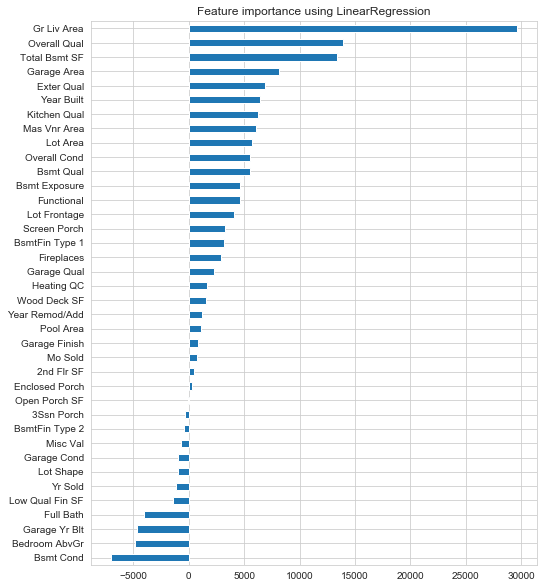

In [378]:
lr = LinearRegression()
run_model(lr,X1,y, 'LinearRegression')

### Model 1b : Lasso Regularization

### get optimal alpha

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=22)

#data scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

197.82681671503173


....................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


### create and evaluate model (Lasso)

Model :  Lasso(alpha=197.82681671503173, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Training R2 score:  0.8804697550983576
Testing R2 score:  0.8710541536958732
MSE score:  729744553.0632463
RMSE score:  27013.78450094037


*** model coefficients: ***
2nd Flr SF             0.000000
3Ssn Porch           -80.996468
Bedroom AbvGr      -4511.946366
Bsmt Cond          -6203.207548
Bsmt Exposure       4700.599860
Bsmt Qual           4946.222282
BsmtFin Type 1      3126.363357
BsmtFin Type 2      -144.237016
Enclosed Porch         0.000000
Exter Qual          6995.373533
Fireplaces          2944.715810
Full Bath          -3191.874271
Functional          4438.975406
Garage Area         8006.488852
Garage Cond           -0.000000
Garage Finish        630.643192
Garage Qual            0.000000
Garage Yr Blt      -2889.399625
Gr Liv Area        29328.236329
Hea

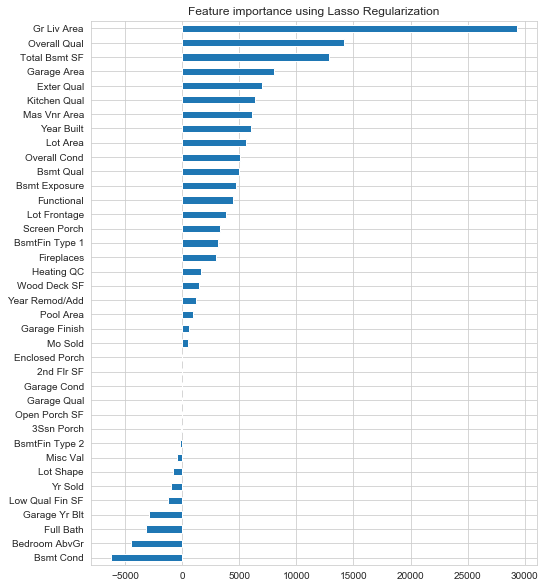

In [380]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
coef = run_model(lasso,X1,y, 'Lasso Regularization')

In [381]:
imp_coef = abs(coef).sort_values(ascending=False)
imp_coef.head(20).index

Index(['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Garage Area',
       'Exter Qual', 'Kitchen Qual', 'Bsmt Cond', 'Mas Vnr Area', 'Year Built',
       'Lot Area', 'Overall Cond', 'Bsmt Qual', 'Bsmt Exposure',
       'Bedroom AbvGr', 'Functional', 'Lot Frontage', 'Screen Porch',
       'Full Bath', 'BsmtFin Type 1', 'Fireplaces'],
      dtype='object')

### Model 1c: Ridge Regularization

### get optimal alpha

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=22)

#data scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

24.094035602395255


### create and evaluate model (Ridge)

Model :  Ridge(alpha=24.094035602395255, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Training R2 score:  0.8802094435430623
Testing R2 score:  0.8702542224767295
MSE score:  734271612.032006
RMSE score:  27097.44659616485


*** model coefficients: ***
2nd Flr SF          1651.045228
3Ssn Porch          -304.162674
Bedroom AbvGr      -4341.034667
Bsmt Cond          -6863.039096
Bsmt Exposure       4663.515121
Bsmt Qual           5150.445062
BsmtFin Type 1      3216.027118
BsmtFin Type 2      -386.159518
Enclosed Porch       306.987031
Exter Qual          6987.257011
Fireplaces          3283.679366
Full Bath          -3254.140313
Functional          4381.956866
Garage Area         8275.781903
Garage Cond         -972.263665
Garage Finish       1016.693380
Garage Qual         1574.571008
Garage Yr Blt      -3804.806859
Gr Liv Area        26899.397708
Heating QC          1697.510627
Kitchen Qual        6515.749982
Lot 

2nd Flr SF          1651.045228
3Ssn Porch          -304.162674
Bedroom AbvGr      -4341.034667
Bsmt Cond          -6863.039096
Bsmt Exposure       4663.515121
Bsmt Qual           5150.445062
BsmtFin Type 1      3216.027118
BsmtFin Type 2      -386.159518
Enclosed Porch       306.987031
Exter Qual          6987.257011
Fireplaces          3283.679366
Full Bath          -3254.140313
Functional          4381.956866
Garage Area         8275.781903
Garage Cond         -972.263665
Garage Finish       1016.693380
Garage Qual         1574.571008
Garage Yr Blt      -3804.806859
Gr Liv Area        26899.397708
Heating QC          1697.510627
Kitchen Qual        6515.749982
Lot Area            5741.685129
Lot Frontage        4042.529199
Lot Shape          -1076.666598
Low Qual Fin SF    -1173.328828
Mas Vnr Area        6222.667658
Misc Val            -659.335684
Mo Sold              696.432338
Open Porch SF        186.692399
Overall Cond        5274.823281
Overall Qual       13788.890828
Pool Are

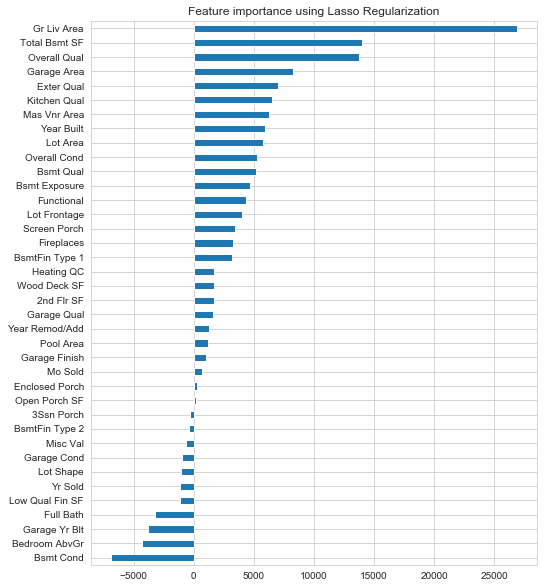

In [383]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
run_model(ridge,X1,y, 'Lasso Regularization')

## Findings (Round 1)
- The results of the 3 models after model fitting and evaluation was compared. The evaluation RMSE is slightly lower than the training RMSE, implying there could be some overfitting in the models.
- For RMSE, I can see that RIDGE has the best score among the three.
- MLR RMSE score:  | 29739
- LASSO RMSE score: | 29704
- RIDGE RMSE score:  | 29589

- On features coefficients, the values across the 3 models are quite close. I will choose the top 8 based on RIDGE's coefficients for second round of model fitting and evaluation.
- For variable 'FullBath', I observed that the coefficient has become negative instead of positive as shown in correlation matrix at the beginning. 

### Kaggle scord (Round 1)
- Kaggle Public : 33650
- Kaggle Private : 35593

## Feature selection (Round 2 - Choose Top 20 from Round 1 Lasso Model)

In [384]:
#choose the top 8 and save to feature2_list for round 2 modeling.
feature2_list = ['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Garage Area',
       'Exter Qual', 'Kitchen Qual', 'Bsmt Cond', 'Mas Vnr Area', 'Year Built',
       'Lot Area', 'Overall Cond', 'Bsmt Qual', 'Bsmt Exposure',
       'Bedroom AbvGr', 'Functional', 'Lot Frontage', 'Screen Porch',
       'Full Bath', 'BsmtFin Type 1', 'Fireplaces']

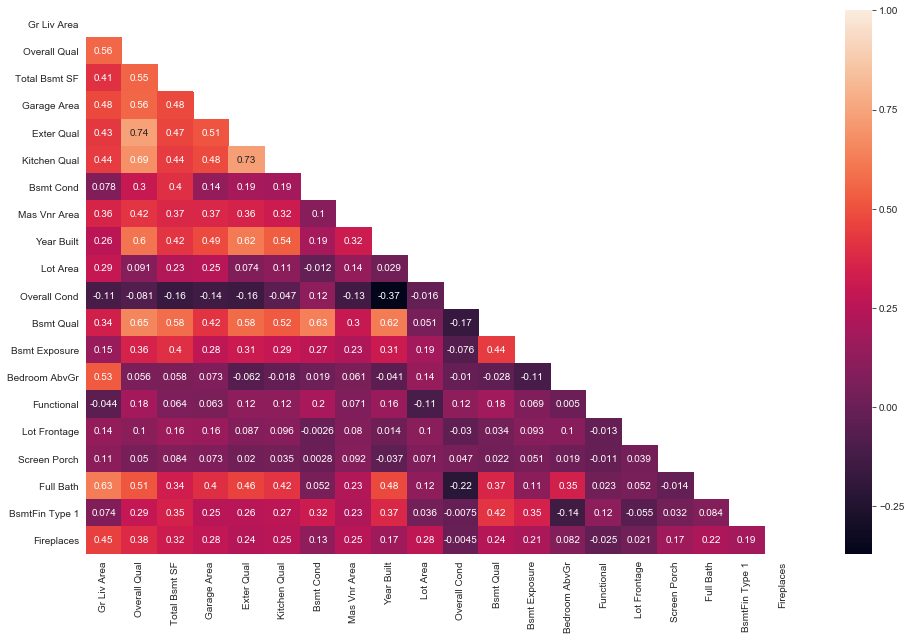

In [385]:
#check for collinearity, nothing above 0.80
heatmap_plotter(train_prep[feature2_list].corr(),annot=True)

## Modeling (ROUND 2 - 20 Features)

### Create our features matrix (`X`) and target vector (`y`)

In [386]:
X2 = train_prep[feature2_list]
y = train_prep['SalePrice']

In [387]:
X2.shape, y.shape

((2048, 20), (2048,))

### Model 2a : Linear Regression Model

Model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training R2 score:  0.879509417176459
Testing R2 score:  0.871343835946496
MSE score:  728105151.325462
RMSE score:  26983.42363981009


*** model coefficients: ***
Gr Liv Area       30529.728754
Overall Qual      13900.843067
Total Bsmt SF     12809.013967
Garage Area        6198.597097
Exter Qual         7758.432440
Kitchen Qual       6833.514184
Bsmt Cond         -7414.590579
Mas Vnr Area       6157.200040
Year Built         7534.777330
Lot Area           6025.644857
Overall Cond       5982.040682
Bsmt Qual          6481.510951
Bsmt Exposure      5327.554555
Bedroom AbvGr     -4777.025012
Functional         4545.701292
Lot Frontage       3929.486294
Screen Porch       3141.862958
Full Bath         -3374.728035
BsmtFin Type 1     3208.096524
Fireplaces         2837.053860
dtype: float64


Gr Liv Area       30529.728754
Overall Qual      13900.843067
Total Bsmt SF     12809.013967
Garage Area        6198.597097
Exter Qual         7758.432440
Kitchen Qual       6833.514184
Bsmt Cond         -7414.590579
Mas Vnr Area       6157.200040
Year Built         7534.777330
Lot Area           6025.644857
Overall Cond       5982.040682
Bsmt Qual          6481.510951
Bsmt Exposure      5327.554555
Bedroom AbvGr     -4777.025012
Functional         4545.701292
Lot Frontage       3929.486294
Screen Porch       3141.862958
Full Bath         -3374.728035
BsmtFin Type 1     3208.096524
Fireplaces         2837.053860
dtype: float64

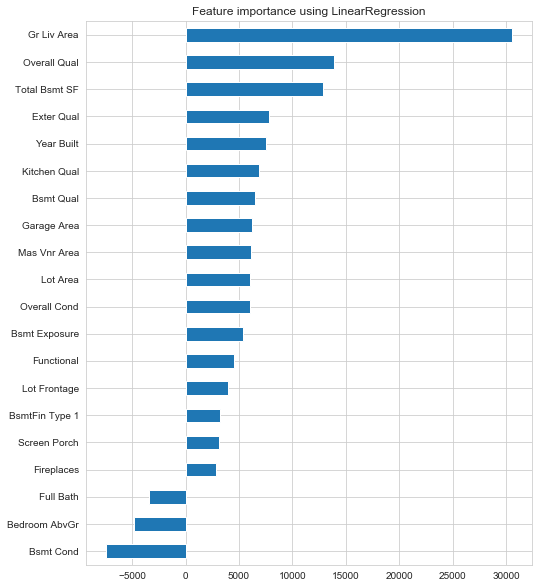

In [388]:
run_model(lr,X2,y, 'LinearRegression')

### Model 2b : Lasso Regularization

In [389]:
#get optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.3,random_state=22)

#data scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

70.0460031118239


.......................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished


Model :  Lasso(alpha=70.0460031118239, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Training R2 score:  0.8795293890946685
Testing R2 score:  0.8718317323950899
MSE score:  725343993.9402089
RMSE score:  26932.211085245282


*** model coefficients: ***
Gr Liv Area       30276.160384
Overall Qual      13965.521794
Total Bsmt SF     12760.063717
Garage Area        6223.265006
Exter Qual         7761.301735
Kitchen Qual       6891.927616
Bsmt Cond         -7158.495611
Mas Vnr Area       6162.976193
Year Built         7400.310103
Lot Area           5990.885809
Overall Cond       5833.235279
Bsmt Qual          6264.111736
Bsmt Exposure      5325.504199
Bedroom AbvGr     -4685.414445
Functional         4469.129680
Lot Frontage       3863.637639
Screen Porch       3115.229876
Full Bath         -3122.842982
BsmtFin Type 1     3190.101535
Fireplaces         2843

Gr Liv Area       30276.160384
Overall Qual      13965.521794
Total Bsmt SF     12760.063717
Garage Area        6223.265006
Exter Qual         7761.301735
Kitchen Qual       6891.927616
Bsmt Cond         -7158.495611
Mas Vnr Area       6162.976193
Year Built         7400.310103
Lot Area           5990.885809
Overall Cond       5833.235279
Bsmt Qual          6264.111736
Bsmt Exposure      5325.504199
Bedroom AbvGr     -4685.414445
Functional         4469.129680
Lot Frontage       3863.637639
Screen Porch       3115.229876
Full Bath         -3122.842982
BsmtFin Type 1     3190.101535
Fireplaces         2843.538870
dtype: float64

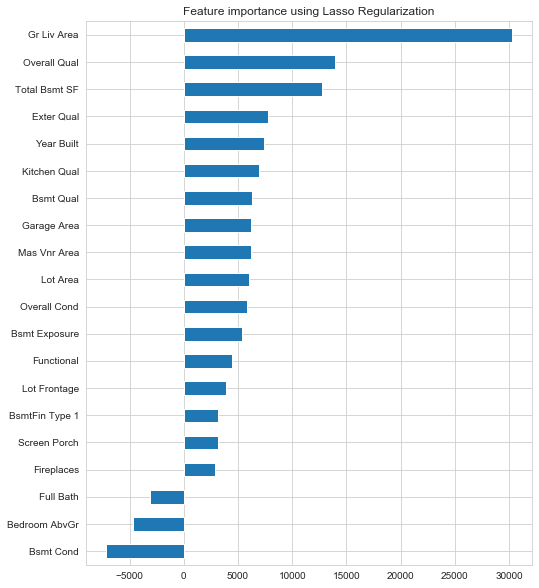

In [390]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
run_model(lasso,X2,y, 'Lasso Regularization')

### Model 2c : Ridge Regularization

In [391]:
#get optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.3,random_state=22)

#data scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

21.461411978584046


Model :  Ridge(alpha=21.461411978584046, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Training R2 score:  0.8796447074805027
Testing R2 score:  0.8728054989528657
MSE score:  719833146.8531607
RMSE score:  26829.706425027478


*** model coefficients: ***
Gr Liv Area       29088.434730
Overall Qual      13875.892932
Total Bsmt SF     12612.137158
Garage Area        6436.946432
Exter Qual         7889.219087
Kitchen Qual       7101.417234
Bsmt Cond         -7142.832611
Mas Vnr Area       6278.612891
Year Built         7092.565285
Lot Area           6042.584323
Overall Cond       5715.525622
Bsmt Qual          6415.394707
Bsmt Exposure      5313.406352
Bedroom AbvGr     -4258.466185
Functional         4402.617792
Lot Frontage       3897.119892
Screen Porch       3191.002605
Full Bath         -2715.712324
BsmtFin Type 1     3232.532054
Fireplaces         3158.016524
dtype: float64


Gr Liv Area       29088.434730
Overall Qual      13875.892932
Total Bsmt SF     12612.137158
Garage Area        6436.946432
Exter Qual         7889.219087
Kitchen Qual       7101.417234
Bsmt Cond         -7142.832611
Mas Vnr Area       6278.612891
Year Built         7092.565285
Lot Area           6042.584323
Overall Cond       5715.525622
Bsmt Qual          6415.394707
Bsmt Exposure      5313.406352
Bedroom AbvGr     -4258.466185
Functional         4402.617792
Lot Frontage       3897.119892
Screen Porch       3191.002605
Full Bath         -2715.712324
BsmtFin Type 1     3232.532054
Fireplaces         3158.016524
dtype: float64

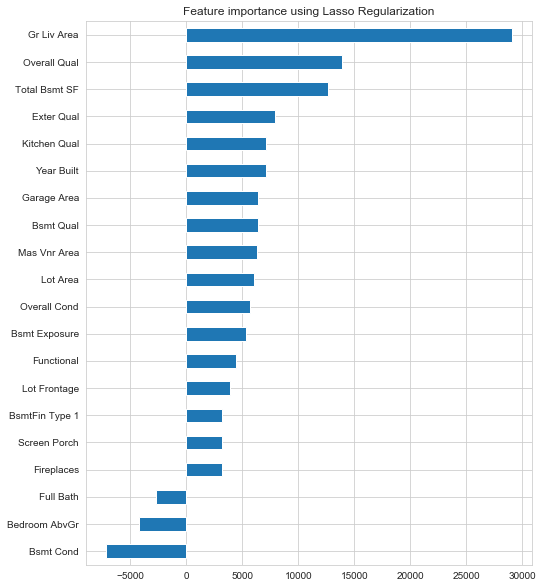

In [392]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
run_model(ridge,X2,y, 'Lasso Regularization')

## Findings (Round 2 - 20 features)
- The results of the 3 models after model fitting and evaluation was compared. The evaluation RMSE is slightly higher than the training RMSE, implying that this model is better fit than those in round 1.
- For RMSE, I can see that RIDGE has the best score among the three. The score for round 3 for all models has improved slightly over round 1. This means that the 8 featues selected are suitable predictors for the target.
- MLR RMSE score:  | 29739 round 1|29686 round 2
- LASSO RMSE score:| 29704 round 1|29675 round 2
- RIDGE RMSE score:| 29589 round 1|29557 round 2

- 

### Kaggle scord (Round 2)
- Kaggle Public : 33650 round 1 | 31668.32672 round 2
- Kaggle Private : 35593 round 1 | 34034.19992 round 2
- Testing RMSE in kaggle has improved as compared to Round 1, implying that this model is more accurate in predicting new data that it has not seen before.

## Modeling (Round 3 - Add interaction term) 

### In this round 3, I will create some interaction terms to see if it can help the models to do better predictions.

### Feature Creation

Based on round 1's coefficient plot, I can see that features related to quality of the house 
(e.g overall_qual, exter_qual, kitchen_qual, ...) are all positively correlated to our target, 
I will create an interaction term total_score to see if this helps the model.

In [393]:
#new feature 1 : total score
train_prep['total_score'] = train_prep['Overall Qual'] * train_prep['Exter Qual'] * train_prep['Kitchen Qual'] * train_prep['Bsmt Qual']


### check correlation of new features

In [406]:
feature3_list = ['Gr Liv Area','Overall Qual','Total Bsmt SF','Garage Area','Exter Qual','Kitchen Qual','Year Built','Garage Area','Bsmt Qual']
feature3_list.append('total_score')

In [407]:
feature3_list

['Gr Liv Area',
 'Overall Qual',
 'Total Bsmt SF',
 'Garage Area',
 'Exter Qual',
 'Kitchen Qual',
 'Year Built',
 'Garage Area',
 'Bsmt Qual',
 'total_score']

In [408]:
train_prep[feature3_list].head()

,Gr Liv Area,Overall Qual,Total Bsmt SF,Garage Area,Exter Qual,Kitchen Qual,Year Built,Garage Area,Bsmt Qual,total_score
0,1479,6,725.0,475.0,4,4,1976,475.0,3,288
1,2122,7,913.0,559.0,4,4,1996,559.0,4,448
2,1057,5,1057.0,246.0,3,4,1953,246.0,3,180
3,1444,5,384.0,400.0,3,3,2006,400.0,4,180
4,1445,6,676.0,484.0,3,3,1900,484.0,2,108


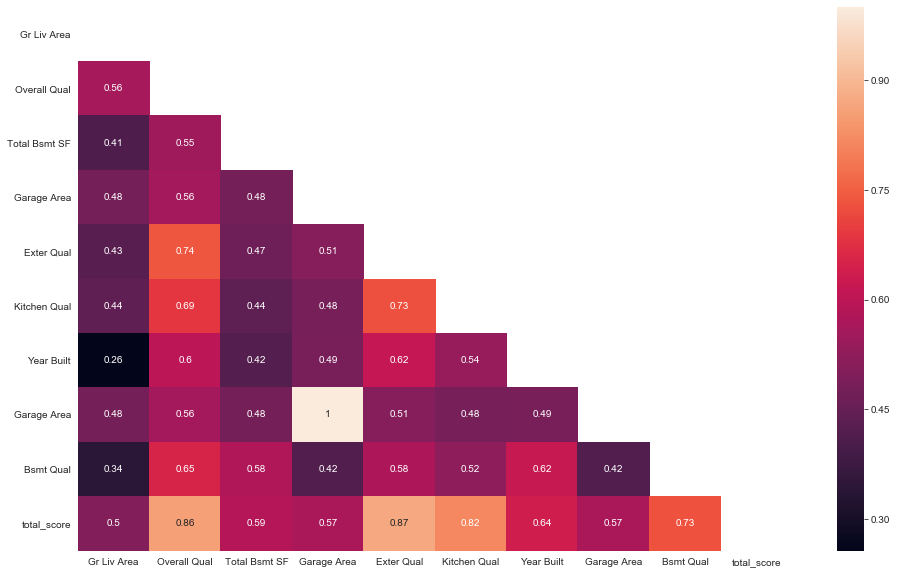

In [409]:
#check for collinearity
heatmap_plotter(train_prep[feature3_list].corr(),annot=True)

> <font size = 3 color = "crimson">You may want to keep to a consistent threshold for dopping features due to multicollinearity.</font>

Collinearity detected between OverallQual, Exter Qual,KitchenQual and the new feature total_score. I will have to drop OverallQual and ExterQual. But For this round, i will not deal with it manually but will let lasso/ridge to handle it automatically and see the result.

### Create our features matrix (`X`) and target vector (`y`)

In [410]:
X3 = train_prep[feature3_list]
y = train_prep['SalePrice']

### Model 3a: Linear Regression Model

Model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training R2 score:  0.8647625472055749
Testing R2 score:  0.8741754537666593
MSE score:  712080147.4975187
RMSE score:  26684.829913220707


*** model coefficients: ***
Gr Liv Area      26573.330564
Overall Qual      5780.323443
Total Bsmt SF    14354.902224
Garage Area       4338.824095
Exter Qual       -7432.126592
Kitchen Qual     -1286.898905
Year Built        6644.337836
Garage Area       4338.824095
Bsmt Qual        -7774.580539
total_score      44731.569217
dtype: float64


Gr Liv Area      26573.330564
Overall Qual      5780.323443
Total Bsmt SF    14354.902224
Garage Area       4338.824095
Exter Qual       -7432.126592
Kitchen Qual     -1286.898905
Year Built        6644.337836
Garage Area       4338.824095
Bsmt Qual        -7774.580539
total_score      44731.569217
dtype: float64

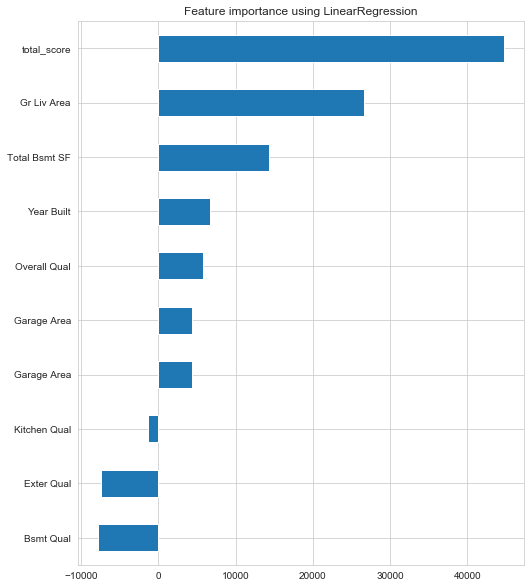

In [411]:
run_model(lr,X3,y, 'LinearRegression')

### Model 3b : Lasso Regularization

In [412]:
#get optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.3,random_state=22)

#data scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#get optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

92.67109116887006


....................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


Model :  Lasso(alpha=92.67109116887006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Training R2 score:  0.8648391740647406
Testing R2 score:  0.8741768755887356
MSE score:  712072100.9652318
RMSE score:  26684.679143006982


*** model coefficients: ***
Gr Liv Area      26490.178817
Overall Qual      5837.518636
Total Bsmt SF    14267.662060
Garage Area       5042.342867
Exter Qual       -6531.975135
Kitchen Qual      -642.216430
Year Built        6289.936650
Garage Area       3655.479340
Bsmt Qual        -7028.513663
total_score      43044.159913
dtype: float64


Gr Liv Area      26490.178817
Overall Qual      5837.518636
Total Bsmt SF    14267.662060
Garage Area       5042.342867
Exter Qual       -6531.975135
Kitchen Qual      -642.216430
Year Built        6289.936650
Garage Area       3655.479340
Bsmt Qual        -7028.513663
total_score      43044.159913
dtype: float64

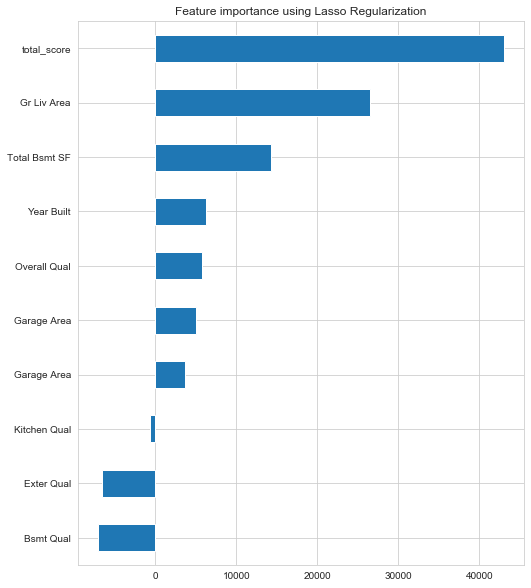

In [413]:
lasso = Lasso(alpha=optimal_lasso.alpha_)
run_model(lasso,X3,y, 'Lasso Regularization')

### Model 3c: Ridge Regularization

In [414]:
#get optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.3,random_state=22)

#data scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#get optimal alpha
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

4.2475715525368996


Model :  Ridge(alpha=4.2475715525368996, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Training R2 score:  0.8648106062917655
Testing R2 score:  0.8740522356006555
MSE score:  712777477.3305995
RMSE score:  26697.89275075094


*** model coefficients: ***
Gr Liv Area      26455.405892
Overall Qual      6180.995614
Total Bsmt SF    14357.726458
Garage Area       4381.397280
Exter Qual       -6791.016769
Kitchen Qual      -876.991925
Year Built        6497.368207
Garage Area       4381.397280
Bsmt Qual        -7331.874848
total_score      43147.266545
dtype: float64


Gr Liv Area      26455.405892
Overall Qual      6180.995614
Total Bsmt SF    14357.726458
Garage Area       4381.397280
Exter Qual       -6791.016769
Kitchen Qual      -876.991925
Year Built        6497.368207
Garage Area       4381.397280
Bsmt Qual        -7331.874848
total_score      43147.266545
dtype: float64

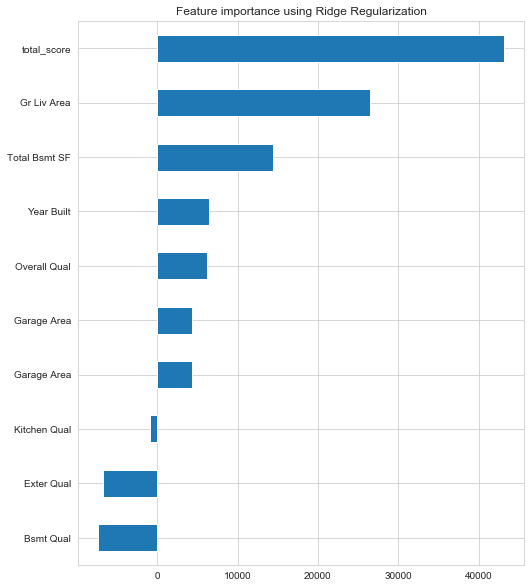

In [415]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
run_model(ridge,X3,y, 'Ridge Regularization')

## Findings (Round 3)
- The results of the 3 models after model fitting and evaluation was compared. 
- For RMSE, I can see that LASSO has the best score among the three. The score for round 3 for all models has improved quite significantly over round 1/2. This means that the new interaction term total_score proved to be useful.
- MLR RMSE score:  | 29739 round 1|29686 round 2|26926 round 3
- LASSO RMSE score:| 29704 round 1|29675 round 2|26913 round 3
- RIDGE RMSE score:| 29589 round 1|29557 round 2|26934 round 3

*** model coefficients: ***
    - Overall Qual      7383.206076
    - Gr Liv Area      24376.637891
    - Exter Qual       -4147.576482
    - Kitchen Qual        -0.000000
    - Total Bsmt SF     9520.733941
    - Garage Area       9714.347697
    - 1st Flr SF        5471.736615
    - Bsmt Qual        -2129.193593
    - total_score      40077.868720

- I can also see that Lasso has handle the collinearity automatically by eliminating KitchenQual.

### Kaggle scord (Round 3)
- Kaggle Public : 33650 round 1 | 31668 round 2 | 31355 round 3
- Kaggle Private : 35593 round 1 | 34034 round 2 | 33857 | round 3


## Make Predictions for Test Data
### The steps below are used for Kaggle Submission for all Round 1 / 2 / 3

In [416]:
#clean and pre-process test data
check_null(test_prep)

,Total,Percent
SalePrice,879,1.0


In [417]:
#Add new features created during feature creation to test set
#new feature 1 : Total score
#this is calcuated by mulitplying all the Qual scores as follows.
test_prep['total_score'] = test_prep['Overall Qual'] * test_prep['Exter Qual'] * test_prep['Kitchen Qual'] * test_prep['Bsmt Qual']


### Create our features matrix (`X`) and target vector (`y`)

In [418]:
#round 1
#feature_used = feature1_list
#round 2
#feature_used = feature2_list
#round 3
feature_used = feature3_list

In [419]:
#whole training data
X = train_prep[feature_used]
y = train_prep['SalePrice']

#test data for predictions
X_test = test_prep[feature_used]

In [420]:
print(X.shape, X_test.shape)

(2048, 10) (879, 10)


In [421]:
#scale training data, transform test data
ss = StandardScaler()
X = ss.fit_transform(X)
X_test = ss.transform(X_test)



In [422]:
#for submission using ridge model
#find optimal alpha for training data
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X,y)

#make prediction for test data
test_preds_ridge = optimal_ridge.predict(X_test)

In [423]:
#for submission using lasso model
#get optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X,y)

#make prediction for test data
test_preds_lasso = optimal_lasso.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [424]:
test_preds_lasso[:10]

array([164309.22453968, 216564.87019983, 192548.78848842, 110950.86161934,
       171611.77118124, 101180.55402611, 109647.11690989, 152734.31508084,
       214446.82934089, 157957.89642284])

In [282]:
#save test predictions to file for submission to kaggle
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_preds_lasso})
output.to_csv('../datasets/submission.csv', index=False)

## Best Model : Round 3 Lasso Model
### Based on kaggle submission, round 3 Lasso Model with 8 features (7 base features + total_score) was the best performing model.

## CONCLUSION

In this project, the dataset given was checked, cleaned and pre-processed before model creation and evaluation. Filter Method chosen to pre-select the top correlated features with our target variable 'SalePrice' proved to be beneficial as this cut down the amount of time needed to go through all 79 variables. With that, I have more time to work on feature creation and to improve model accuracy. 

During the feature creation process, I have tried to create several interaction terms but only total_score shown to be effective in helping the model to perform better. I have learnt that a good understanding of the underlying dataaset is crucical in determing how and what new features can be created to help the model to improve its accuracy.

It was observed that Lasso/Ridge regularization methods were able to handle multi-collinearity automatically. This was extremely useful for projects with large no. of variables.

A summary of the model score is shown below for easy reference.

## Summary on Model Score (RMSE)
### Round 1 (14 features)
    Model : Ridge
    Evaluation : 29589
    Kaggle Public : 33650
    Kaggle Private : 35593
    
### Round 2 (8 features)
    Model : Ridge
    Evaluation : 29557
    Kaggle Public : 31668.32672
    Kaggle Private : 34034.19992

### Round 3 (7 features with 1 interaction term (total_score)
    Model : Lasso
    Evaluation :   26913  
    Kaggle Public : 31355
    Kaggle Private : 33857